## Preparação dos dados

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("importacao_siscori.csv", encoding = 'latin-1', dtype={'codigo_pedido':'string'})
data.tail()

,codigo_pedido,anomes,cod_ncm,pais,pais_de_origem,pais_1,pais_de_aquisicao,descricao_do_produto,qtd_total_pedido,unidade_desembaraco
14161,0000001188030000100016,202011,84502090,160,"CHINA, REPUBLICA POP",190,"COREIA (DO SUL), REP",CV5011WG4A.ABWGBRS MAQUINA DE LAVAR ROUPA TIPO...,1610.0,PORTO DE SANTOS
14162,0000001188030000100017,202011,84502090,160,"CHINA, REPUBLICA POP",190,"COREIA (DO SUL), REP",FV5011WG4.ABWFBRS MAQUINA DE LAVAR ROUPA(LAVAD...,1610.0,PORTO DE SANTOS
14163,0000001188030000100018,202011,84502090,160,"CHINA, REPUBLICA POP",190,"COREIA (DO SUL), REP",CV5011WG4A.ABWGBRS MAQUINA DE LAVAR ROUPA TIPO...,1610.0,PORTO DE SANTOS
14164,0000001188030000100019,202011,84502090,160,"CHINA, REPUBLICA POP",190,"COREIA (DO SUL), REP",FV5011WG4.ABWFBRS MAQUINA DE LAVAR ROUPA(LAVAD...,1610.0,PORTO DE SANTOS
14165,0000001264750000200001,202011,84502090,190,"COREIA (DO SUL), REP",245,ESPANHA,"Lavadora de roupa em aço inox, com aquecimento...",45.0,SAO PAULO


In [4]:
data['anomes'] = pd.to_datetime(data['anomes'].astype(str), format ='%Y%m' ) # transformar coluna em data

In [5]:
data['cod_ncm'] = data['cod_ncm'].replace({73211100:"Fogões", 84501100:"Máquina de lavar roupa inferior a 10kg", 84502090:"Máquina de lavar roupa superior a 10kg"}) # substituir códigos por nomes

In [6]:
data['codigo_pedido'] = data['codigo_pedido'].str[0:17] # remover ultimos 5 dígitos da coluna código_pedido

In [7]:
data['codigo_pedido']= data['codigo_pedido'].drop_duplicates() # remover valores duplicados e NAs
data = data.dropna(how = 'any')

In [8]:
data['codigo_pedido'].count() # o valor da contagem demonstra que os valores repetidos foram removidos

7308

## Análise dos dados

### Qual produto tem maior participação ao considerarmos as séries históricas de importação?

In [9]:
res_por_produto = data.groupby('cod_ncm').sum()
res_por_produto = res_por_produto.sort_values(['qtd_total_pedido'], ascending = False)
res_por_produto

,pais,pais_1,qtd_total_pedido
cod_ncm,,,
Máquina de lavar roupa superior a 10kg,1047653,1293505,1403478.124
Fogões,533613,602338,728775.700
Máquina de lavar roupa inferior a 10kg,42480,40066,8775.000


R: O produto com a maior participação na base de dados é o produto com o cod_ncm "Máquina de lavar roupa superior a 10 kg" com uma quantidade total pedida de cerca de 1,4 milhão de unidades. O gráfico abaixo demonstra os valores de forma visual.

<AxesSubplot:ylabel='cod_ncm'>

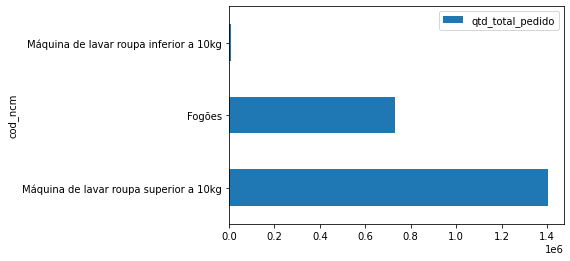

In [14]:
data_group = data.groupby(['cod_ncm'])['qtd_total_pedido'].sum().reset_index()
data_group.sort_values(['qtd_total_pedido'], ascending= False).plot(legend=True, kind='barh', x ='cod_ncm', y='qtd_total_pedido')

### Como se dá a dinâmica, ao longo do tempo, das séries para cada produto? Descreva.

<AxesSubplot:xlabel='anomes'>

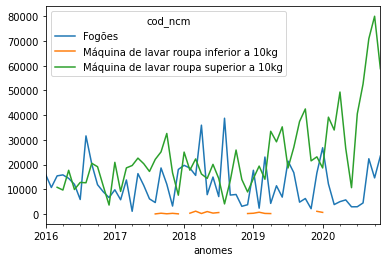

In [204]:
produtos = ['Fogões','Máquina de lavar roupa inferior a 10kg', 'Máquina de lavar roupa superior a 10kg']
data.produtos = data.loc[data['cod_ncm'].isin(produtos)]
data.groupby(['anomes','cod_ncm'])['qtd_total_pedido'].sum().unstack().plot()

R: O gráfico acima demonstra que os produtos "fogões" e "máquina de lavar roupa superior a 10kg" seguiram uma tendência de estabilidade de crescimento até 2019, depois disso, percebe-se que as máquinas de lavar roupa superior a 10kg descolaram dos fogões e começaram a apresentar uma tendência de crescimento, com um pico em meados de 2020, fenônemo que pode ser relacionado a pandemia da covid-19. Já os fogões apresentaram a manutenção de sua tendência em toda a série histórica. No que se refere-se a "máquina de lavar roupa inferior a 10kg", existem pequenos períodos em que esse produto aparece na série histórica, como em 2018 e 2019.

### Há diferença na participação dos países exportadores quando olhamos para 'pais_de_origem' ou para 'pais_de_aquisicao'?

In [15]:
res_pais_origem = data.groupby('pais_de_origem').sum()
res_por_origem = res_pais_origem.sort_values(['qtd_total_pedido'], ascending = False)
res_pais_origem

,pais,pais_1,qtd_total_pedido
pais_de_origem,,,
ALEMANHA,1012,5955,105.000
ARGENTINA,1575,1575,452.000
AUSTRALIA,138,398,2.000
AUSTRIA,288,544,8.000
BRASIL,945,1972,79.000
CANADA,149,23,1.000
CHILE,2686,5434,99.000
"CHINA, REPUBLICA POP",781920,1144445,1843013.820
CINGAPURA,1482,1482,5.000


In [16]:
res_pais_aquisição = data.groupby('pais_de_aquisicao').sum()
res_por_aquisição = res_pais_aquisição.sort_values(['qtd_total_pedido'], ascending = False)
res_pais_aquisição

,pais,pais_1,qtd_total_pedido
pais_de_aquisicao,,,
ALEMANHA,2393,759,282.000
ARGENTINA,1849,1701,457.000
AUSTRIA,1013,144,4.000
BELGICA,628,87,3.000
BRASIL,315,315,68.000
CANADA,69,149,1.000
"CAYMAN, ILHAS",1528,274,2.000
CHILE,2244,2212,60.000
"CHINA, REPUBLICA POP",93845,92320,321529.000


R: As tabelas acima demonstram que existem diferenças na participação dos países nas exportações(pais_de_origem) e importações(pais_de_aquisição) dos produtos analisados na série histórica. Entre os países que destaco nas exportações está a China, que tem cerca de 1,8 milhão de unidades exportadas, e 321 mil unidades importadas dos produtos analisados. Já no que se refere-se as importações, destaca-se à Coreia do Sul, país que apresentou cerca de 1,1 milhão de unidades importadas, e países como Cingapura e Hong Kong, que importaram cerca de 180 mil e 193 mil unidades dos produtos contidos na base de dados, respectivamente.